In [45]:
import matplotlib.pyplot as plt
from time import perf_counter
import numpy as np
import opt, raw

In [46]:
def experiment(input: tuple, fun1, fun2) -> tuple[int]:
    init_1 = perf_counter()
    fun1(*input)
    fin_1 = perf_counter()
    init_2 = perf_counter()
    fun2(*input)
    fin_2 = perf_counter()
    return (fin_1 -init_1, fin_2-init_2)
    

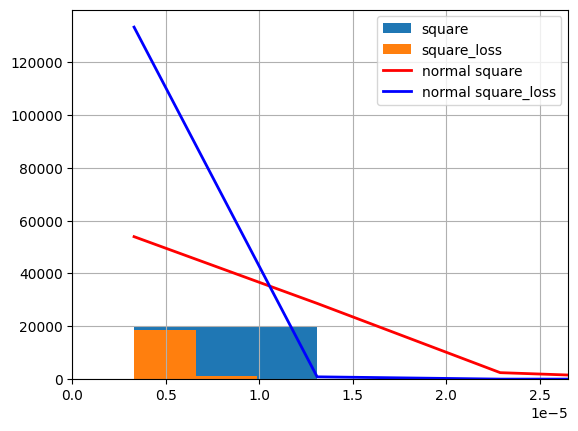

In [66]:

func1, func2 = raw.square, opt.square_loss
num_iter = 10000

list_inputs = [(f, y) 
               for f in np.linspace(-10, 10, num_iter, dtype=np.float16)
               for y in [-1,1]]

fun1, fun2 = zip(*map(lambda x: experiment(x, func1, func2), list_inputs))

fig = plt.figure()
count, bins, ignored = plt.hist(x=list(fun1), bins=int(np.ceil(2*(2*num_iter)**(1/3))), label=func1.__name__)

plt.hist(x=list(fun2), bins=int(np.ceil(2*(2*num_iter)**(1/3))), label=func2.__name__)
mu1, sigma1 = np.array(fun1).mean(), np.array(fun1).std()
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ),
         linewidth=2, color='r', label=f"normal {func1.__name__}")

mu2, sigma2 = np.array(fun2).mean(), np.array(fun2).std()
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ),
         linewidth=2, color='b', label=f"normal {func2.__name__}")
a = max([mu1+3*sigma1, mu2+3*sigma2])
plt.xlim(0, a)
plt.grid()
plt.legend()
plt.show()

In [30]:
raw.square.__name__

'square'

In [52]:
np.ceil(2*(num_iter)**(1/3))

44.0